In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
df=pd.read_csv('/content/dm_sample.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Feature_1  10 non-null     float64
 1   Feature_2  10 non-null     float64
 2   Feature_3  10 non-null     float64
 3   Feature_4  10 non-null     float64
 4   Feature_5  10 non-null     float64
dtypes: float64(5)
memory usage: 532.0 bytes


In [ ]:
print(df.head())

   Feature_1  Feature_2  Feature_3  Feature_4  Feature_5
0   0.374540   0.950714   0.731994   0.598658   0.156019
1   0.155995   0.058084   0.866176   0.601115   0.708073
2   0.020584   0.969910   0.832443   0.212339   0.181825
3   0.183405   0.304242   0.524756   0.431945   0.291229
4   0.611853   0.139494   0.292145   0.366362   0.456070


In [ ]:
X=df.values

In [ ]:
print("Original Data: \n", X[:5])

Original Data: 
 [[0.37454012 0.95071431 0.73199394 0.59865848 0.15601864]
 [0.15599452 0.05808361 0.86617615 0.60111501 0.70807258]
 [0.02058449 0.96990985 0.83244264 0.21233911 0.18182497]
 [0.18340451 0.30424224 0.52475643 0.43194502 0.29122914]
 [0.61185289 0.13949386 0.29214465 0.36636184 0.45606998]]


In [ ]:
mean_vec = np.mean(X, axis=0)
print("Mean Vector: \n", mean_vec)

Mean Vector: 
 [0.43320552 0.39041435 0.44789285 0.58919833 0.36890847]


In [ ]:
X_centered = X - mean_vec
print("Centered Data: \n", X_centered[:5])

Centered Data: 
 [[-0.0586654   0.56029995  0.28410109  0.00946016 -0.21288983]
 [-0.277211   -0.33233074  0.4182833   0.01191668  0.33916411]
 [-0.41262103  0.5794955   0.38454979 -0.37685922 -0.1870835 ]
 [-0.24980101 -0.08617211  0.07686358 -0.15725331 -0.07767933]
 [ 0.17864737 -0.25092049 -0.1557482  -0.22283648  0.08716152]]


In [ ]:
cov_matrix = np.cov(X_centered, rowvar=False)
print("Covariance Matrix: \n", cov_matrix)

Covariance Matrix: 
 [[ 0.08770185 -0.0434962  -0.04087684  0.01569507  0.00444088]
 [-0.0434962   0.10442737  0.03645035 -0.02206237 -0.04760667]
 [-0.04087684  0.03645035  0.09817074 -0.0467601  -0.02807154]
 [ 0.01569507 -0.02206237 -0.0467601   0.0510377   0.02869526]
 [ 0.00444088 -0.04760667 -0.02807154  0.02869526  0.08001377]]


In [ ]:
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
print("Eigenvalues: \n", eigenvalues)
print("Eigenvectors: \n", eigenvectors)

Eigenvalues: 
 [0.0191466  0.02788668 0.07386186 0.08343888 0.2170174 ]
Eigenvectors: 
 [[-0.02381222 -0.53985728 -0.3897827   0.62591669 -0.40532066]
 [ 0.12658256 -0.53045547  0.57314649  0.26208335  0.55263846]
 [-0.46347385 -0.3171279  -0.56255792 -0.29993546  0.52743644]
 [-0.83117369 -0.07839399  0.44187029 -0.03539682 -0.32634704]
 [ 0.27884068 -0.56608779  0.08861024 -0.66957181 -0.38159443]]


In [ ]:
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

In [ ]:
top_eigenvectors = eigenvectors[:, :2]
print("Top 2 Pricipal Components: \n", top_eigenvectors)

Top 2 Pricipal Components: 
 [[-0.40532066  0.62591669]
 [ 0.55263846  0.26208335]
 [ 0.52743644 -0.29993546]
 [-0.32634704 -0.03539682]
 [-0.38159443 -0.66957181]]


In [ ]:
X_pca = X_centered @ top_eigenvectors
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
print("Transformed Data: \n",df_pca.head())

Transformed Data: 
         PC1       PC2
0  0.561417  0.167124
1  0.016006 -0.613584
2  0.884698 -0.083125
3  0.175129 -0.144415
4 -0.253763  0.042298


In [ ]:
import matplotlib.pyplot as plt

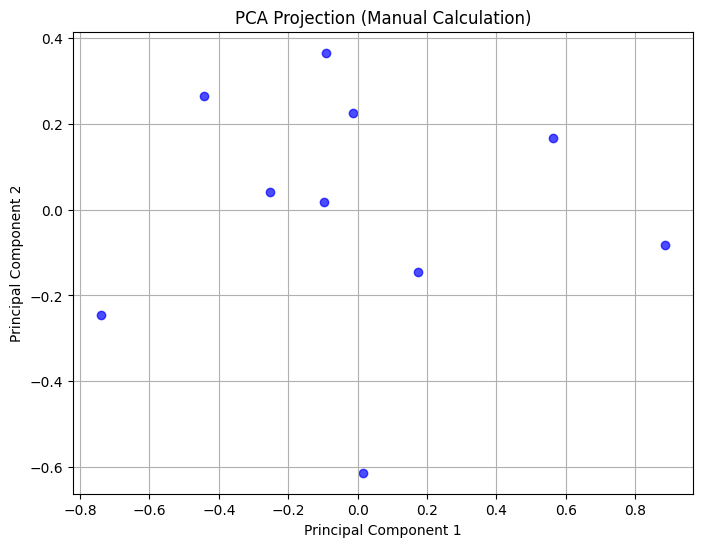

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(df_pca['PC1'], df_pca['PC2'], color='blue', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Projection (Manual Calculation)')
plt.grid()
plt.show()